 Data: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download

## 1. Load

#  HR Analytics

## Table of Contents
<ul>
<li><a href="#intro">Load</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">modeling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## 1. Load

In [ ]:
#!pip install -U pandas_profiling

In [ ]:
# Added depedency
#!pip install -U MarkupSafe==2.0.1

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas_profiling
from functools import reduce
import seaborn as sns

%matplotlib inline

In [ ]:
from platform import python_version
python_version()

'3.7.13'

In [ ]:
import subprocess
subprocess.check_output(['ls'])

b'sample_data\nWA_Fn-UseC_-HR-Employee-Attrition.csv\n'

In [ ]:
dataset = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [ ]:
os.getcwd()

'/content'

In [ ]:
# Have to manually uplaod the file to session storage before running, if using google colab
df = pd.read_csv('/content/'+ dataset)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 1470 rows and 35 columns.


In [ ]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 50)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
df.describe(exclude='O').round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


Notes (J 2022-04-25)

    No null in the dataset
    Only two types of data: categorical(object) and numerical (int64)
    No-value-added columns:
        Over18 - all records = Y
        EmployeeCount - count of each employee
        EmployeeNumber - for manage purpose, not for prediction 
          will keep it as unique key.
        StandardHours - all employees = 80
        PerformanceRating - not that relevant cause the mean is 3.15 with an stddev of 0.36
    Data dictionary for:
        DailyRate
        HourlyRate
        JobInvolvement
        JobLevel
        MonthlyRate
        PercentSalaryHike
    Feature that are evenly distributed which could lead to bias
        Education
        EnvironmetSatisfaction
        JobInvolvement
        JobLevel
        JobSatisfaction
        RelationshipSatisfaction
        WorkLifeBalance




## 2. Data Wrangling

In [ ]:
#Copying df to df_cln to drop irrelevant features ('Over18', 'EmployeeCount', 'StandardHours')
df_cln = df.copy()

In [ ]:
df_cln.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True)
df_cln.shape

(1470, 32)

#### Subsets

In [ ]:
A_df = df_cln[['EmployeeNumber','Age', 'Attrition', 'BusinessTravel', 'DailyRate', 
                  'Department','DistanceFromHome', 'Education', 'EducationField', 'PerformanceRating']]
A_df.shape

(1470, 10)

In [ ]:
h_df = df_cln[['EmployeeNumber','EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
                  'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus']]


h_df = pd.get_dummies(h_df, columns=['JobRole'])
h_df = pd.get_dummies(h_df, columns=['Gender'])
h_df = pd.get_dummies(h_df, columns=['MaritalStatus'])
h_df.drop('HourlyRate', axis=1, inplace=True)
h_df.drop('Gender_Female', axis=1, inplace=True)


h_df.shape

(1470, 18)

In [ ]:
c_df = df_cln[['EmployeeNumber','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
                  'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel' ]]

c_df = pd.get_dummies(c_df, columns=['OverTime'])
c_df.drop('OverTime_No', axis=1, inplace=True)

conditions = [
    c_df['NumCompaniesWorked'] == 0,
    (c_df['NumCompaniesWorked'] == 1) | (c_df['NumCompaniesWorked'] == 2),    # 1-2
    (c_df['NumCompaniesWorked'] > 2) & (c_df['NumCompaniesWorked'] < 6),    # 3-5 
    c_df['NumCompaniesWorked'] > 5    # 5+
]

values = [0, 1, 2, 3]

c_df['NumCompaniesWorked_Ranges'] = np.select(conditions, values, default=7)

conditions = [
    c_df['PercentSalaryHike'] <= 10,
    (c_df['PercentSalaryHike'] > 10) & (c_df['PercentSalaryHike'] < 16),    # 11-15
    (c_df['PercentSalaryHike'] > 15) & (c_df['PercentSalaryHike'] < 21),    # 16-20 
    c_df['PercentSalaryHike'] > 20    # 20+
]

values = [0, 1, 2, 3]

c_df['PercentSalaryHike_Ranges'] = np.select(conditions, values, default=7)

conditions = [
    c_df['MonthlyIncome'] <= 2500,
    (c_df['MonthlyIncome'] > 2500) & (c_df['MonthlyIncome'] <= 5000),    
    (c_df['MonthlyIncome'] > 5000) & (c_df['MonthlyIncome'] <= 7500),  
    (c_df['MonthlyIncome'] > 7500) & (c_df['MonthlyIncome'] <= 10000),
    (c_df['MonthlyIncome'] > 10000) & (c_df['MonthlyIncome'] <= 15000),
    c_df['MonthlyIncome'] > 15000    
]

values = [0, 1, 2, 3, 4, 5]

c_df['MonthlyIncome_Ranges'] = np.select(conditions, values, default=7)

c_df

,EmployeeNumber,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,OverTime_Yes,NumCompaniesWorked_Ranges,PercentSalaryHike_Ranges,MonthlyIncome_Ranges
0,1,5993,19479,8,11,1,0,1,3,1,2
1,2,5130,24907,1,23,4,1,0,1,3,2
2,4,2090,2396,6,15,2,0,1,3,1,0
3,5,2909,23159,1,11,3,0,1,1,1,1
4,7,3468,16632,9,12,4,1,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,2571,12290,4,17,3,1,0,2,2,1
1466,2062,9991,21457,4,15,1,1,0,2,1,3
1467,2064,6142,5174,1,20,2,1,1,1,2,2
1468,2065,5390,13243,2,14,4,0,0,1,1,2


In [ ]:
j_df = df_cln[['EmployeeNumber','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
j_df.shape

(1470, 8)

In [ ]:
#pandas_profiling.ProfileReport(A_df)

In [ ]:
#pandas_profiling.ProfileReport(h_df)

In [ ]:
#pandas_profiling.ProfileReport(c_df)

### J Data Wrangling

In [ ]:
#pandas_profiling.ProfileReport(j_df)

In [ ]:
j_df

,EmployeeNumber,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,8,0,1,6,4,0,5
1,2,10,3,3,10,7,1,7
2,4,7,3,3,0,0,0,0
3,5,8,3,3,8,7,3,0
4,7,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...
1465,2061,17,3,3,5,2,0,3
1466,2062,9,5,3,7,7,1,7
1467,2064,6,0,3,6,2,0,3
1468,2065,17,3,2,9,6,0,8


#### Findings from j_df ['EmployeeNumber','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']:

#### 1. Handling missing values: N/A


#### 2. Outliers: N/A

#### 3. Duplicate data: YES, but we will keep them because they all make sense.


#### 4. Converting datatypes: WorkLifeBalance Categorical OR Numeric?


#### 5. Scaling: N/A

#### 6. Parsing dates: N/A

#### 7. Fix structural errors: N/A

#### 8. Data transformation: N/A

#### 9. EmployeeNumber is an identification number which doesn't provide any meanings to our analysis so we will drop this column. (A: it was our join key, so I added it back)


In [ ]:
#j_df.drop(['EmployeeNumber'], axis = 1, inplace = True) 

### A Data Wrangling

In [ ]:
#pandas_profiling.ProfileReport(A_df)

In [ ]:
# Create Dummy Variables for Categoricals
A_df_temp = pd.get_dummies(A_df, columns=['Attrition', 'BusinessTravel', 'Department', 'EducationField' , 'PerformanceRating' ], drop_first=True)

In [ ]:
# Create Scale or Transform Variable for Numerical, if needed
# No Transformation or Scalling Done on Numerical Variables
# Age -> Normal distribution without any problems 
# DailyRate -> Somewhat flat
# DistanceFromHome -> Positive skew, but log transformation doen't really help
A_df_temp['DailyRate_Log'] = np.log(A_df['DailyRate'])
A_df_temp['DistanceFromHome_Log'] = np.log(A_df['DistanceFromHome'])

In [ ]:
# Tried log transformation on DailyRate and DistanceFromHome but it doesn't seem to help help  distribution
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#axs[0].hist(A_df_temp['DailyRate_Log'], bins=30)
#axs[1].hist(A_df_temp['DistanceFromHome_Log'], bins=30)

In [ ]:
# Output feature set
A_df_features = A_df_temp[['EmployeeNumber',
  'Age',
  'Attrition_Yes',
  'BusinessTravel_Travel_Frequently', # Non-Travel is reference category
  'BusinessTravel_Travel_Rarely',
  #'DailyRate', # Drop and only keep monthly income in Caleb's set
  'Department_Research & Development', # Human Resources is reference category
  'Department_Sales',
  'DistanceFromHome',
  'EducationField_Life Sciences', # Human Resources is reference category
  'EducationField_Marketing',
  'EducationField_Medical',
  'EducationField_Other',
  'EducationField_Technical Degree',
  'PerformanceRating_4']]

In [ ]:
data_frames = [A_df_features, h_df, c_df, j_df] # list of dataframes

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['EmployeeNumber'],
                                            how='outer'), data_frames)

In [ ]:
df_merged

,EmployeeNumber,Age,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,DistanceFromHome,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,PerformanceRating_4,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,OverTime_Yes,NumCompaniesWorked_Ranges,PercentSalaryHike_Ranges,MonthlyIncome_Ranges,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,0,1,0,1,1,1,0,0,0,0,0,2,3,2,4,0,0,0,0,0,0,0,1,0,0,0,0,1,5993,19479,8,11,1,0,1,3,1,2,8,0,1,6,4,0,5
1,2,49,0,1,0,1,0,8,1,0,0,0,0,1,3,2,2,2,0,0,0,0,0,0,1,0,0,1,0,1,0,5130,24907,1,23,4,1,0,1,3,2,10,3,3,10,7,1,7
2,4,37,1,0,1,1,0,2,0,0,0,1,0,0,4,2,1,3,0,0,1,0,0,0,0,0,0,1,0,0,1,2090,2396,6,15,2,0,1,3,1,0,7,3,3,0,0,0,0
3,5,33,0,1,0,1,0,3,1,0,0,0,0,0,4,3,1,3,0,0,0,0,0,0,1,0,0,0,0,1,0,2909,23159,1,11,3,0,1,1,1,1,8,3,3,8,7,3,0
4,7,27,0,0,1,1,0,2,0,0,1,0,0,0,1,3,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,3468,16632,9,12,4,1,0,3,1,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,0,1,0,1,0,23,0,0,1,0,0,0,3,4,2,4,0,0,1,0,0,0,0,0,0,1,0,1,0,2571,12290,4,17,3,1,0,2,2,1,17,3,3,5,2,0,3
1466,2062,39,0,0,1,1,0,6,0,0,1,0,0,0,4,2,3,1,1,0,0,0,0,0,0,0,0,1,0,1,0,9991,21457,4,15,1,1,0,2,1,3,9,5,3,7,7,1,7
1467,2064,27,0,0,1,1,0,4,1,0,0,0,0,1,2,4,2,2,0,0,0,0,1,0,0,0,0,1,0,1,0,6142,5174,1,20,2,1,1,1,2,2,6,0,3,6,2,0,3
1468,2065,49,0,1,0,0,1,2,0,0,1,0,0,0,4,2,2,2,0,0,0,0,0,0,0,1,0,1,0,1,0,5390,13243,2,14,4,0,0,1,1,2,17,3,2,9,6,0,8


## 3. Exploratory Data Analysis

In [ ]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
            
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

In [ ]:
df_explore = df.copy()
df_explore2 = df_merged.copy()
df_explore

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
df_explore['Education'] = df_explore['Education'].replace([1,2,3,4,5],['WithoutCollege','College','Bachelor','Master','Doctor'])

In [ ]:
df_explore

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,WithoutCollege,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,WithoutCollege,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,WithoutCollege,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
df_explore2

,EmployeeNumber,Age,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,DistanceFromHome,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,PerformanceRating_4,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,OverTime_Yes,NumCompaniesWorked_Ranges,PercentSalaryHike_Ranges,MonthlyIncome_Ranges,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,0,1,0,1,1,1,0,0,0,0,0,2,3,2,4,0,0,0,0,0,0,0,1,0,0,0,0,1,5993,19479,8,11,1,0,1,3,1,2,8,0,1,6,4,0,5
1,2,49,0,1,0,1,0,8,1,0,0,0,0,1,3,2,2,2,0,0,0,0,0,0,1,0,0,1,0,1,0,5130,24907,1,23,4,1,0,1,3,2,10,3,3,10,7,1,7
2,4,37,1,0,1,1,0,2,0,0,0,1,0,0,4,2,1,3,0,0,1,0,0,0,0,0,0,1,0,0,1,2090,2396,6,15,2,0,1,3,1,0,7,3,3,0,0,0,0
3,5,33,0,1,0,1,0,3,1,0,0,0,0,0,4,3,1,3,0,0,0,0,0,0,1,0,0,0,0,1,0,2909,23159,1,11,3,0,1,1,1,1,8,3,3,8,7,3,0
4,7,27,0,0,1,1,0,2,0,0,1,0,0,0,1,3,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,3468,16632,9,12,4,1,0,3,1,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,0,1,0,1,0,23,0,0,1,0,0,0,3,4,2,4,0,0,1,0,0,0,0,0,0,1,0,1,0,2571,12290,4,17,3,1,0,2,2,1,17,3,3,5,2,0,3
1466,2062,39,0,0,1,1,0,6,0,0,1,0,0,0,4,2,3,1,1,0,0,0,0,0,0,0,0,1,0,1,0,9991,21457,4,15,1,1,0,2,1,3,9,5,3,7,7,1,7
1467,2064,27,0,0,1,1,0,4,1,0,0,0,0,1,2,4,2,2,0,0,0,0,1,0,0,0,0,1,0,1,0,6142,5174,1,20,2,1,1,1,2,2,6,0,3,6,2,0,3
1468,2065,49,0,1,0,0,1,2,0,0,1,0,0,0,4,2,2,2,0,0,0,0,0,0,0,1,0,1,0,1,0,5390,13243,2,14,4,0,0,1,1,2,17,3,2,9,6,0,8


In [ ]:
sns.set_palette("Set2",10)

In [ ]:
df_explore2['Attrition_Yes'] = df_explore2['Attrition_Yes'].replace([0,1],['No','Yes'])
df_explore2['MonthlyIncome_Ranges'] = df_explore2['MonthlyIncome_Ranges'].replace([0, 1, 2, 3, 4, 5],['0 - 2500','2501 ~ 5000','5001 ~ 7500','7501 ~ 10000','10001 ~ 15000','15000 +'])

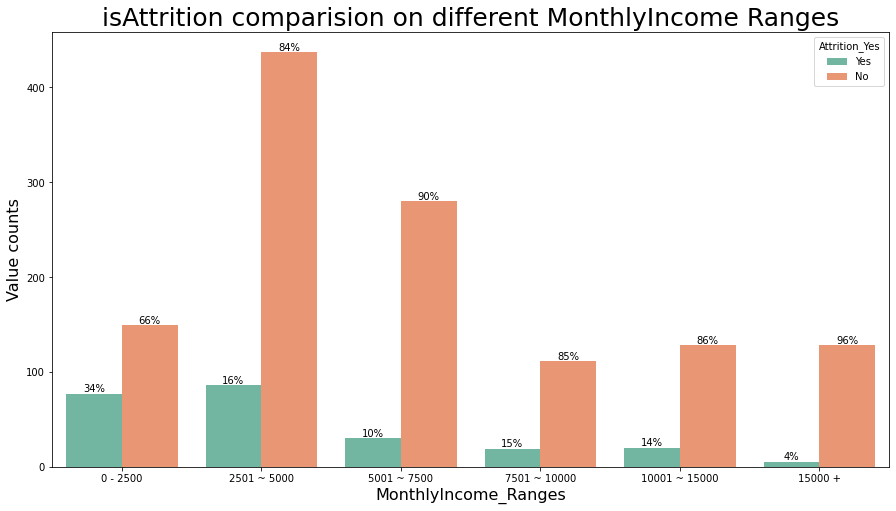

In [ ]:

plt.figure(figsize=(15,8))
ax = sns.countplot(x='MonthlyIncome_Ranges',  hue='Attrition_Yes', data=df_explore2,order=['0 - 2500','2501 ~ 5000','5001 ~ 7500','7501 ~ 10000','10001 ~ 15000','15000 +'])
plt.title('isAttrition comparision on different MonthlyIncome Ranges', fontsize=25)
plt.xlabel('MonthlyIncome_Ranges', fontsize=16)
plt.ylabel('Value counts', fontsize=16)
barPerc(df_explore2,'MonthlyIncome_Ranges',ax)

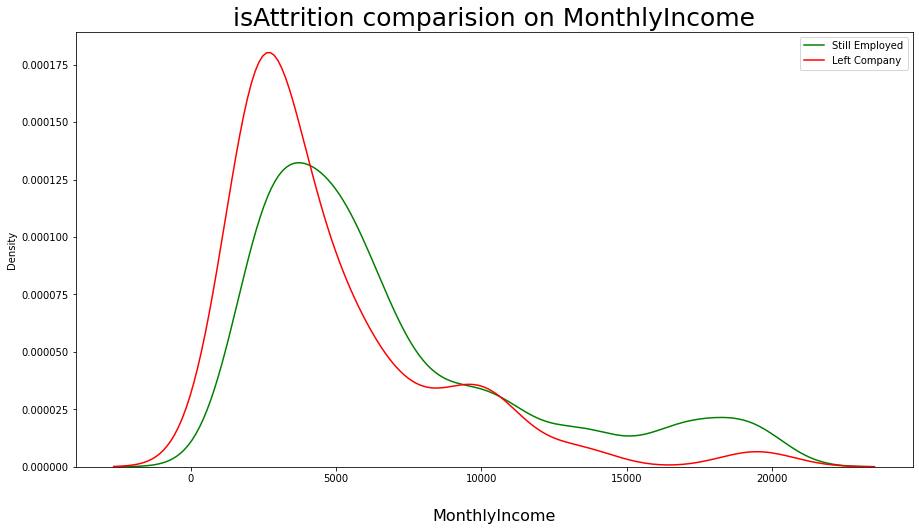

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(x = df_explore.loc[df_explore.Attrition == "No"].MonthlyIncome, label = "Still Employed", color = "green")
ax = sns.kdeplot(x = df_explore.loc[df_explore.Attrition == "Yes"].MonthlyIncome, label = "Left Company", color = "red")
plt.title('isAttrition comparision on MonthlyIncome', fontsize=25)
ax.set_xlabel("MonthlyIncome", labelpad = 25, fontsize=16)
ax.legend()

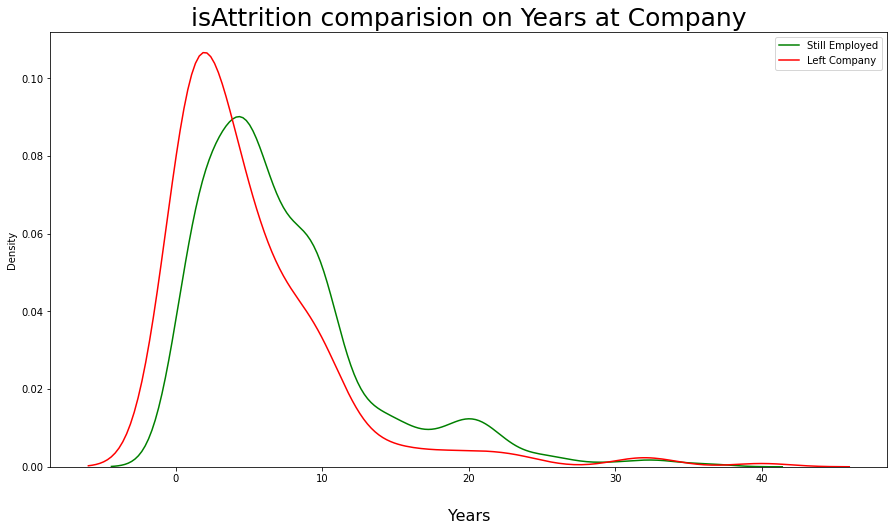

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(x = df_explore.loc[df_explore.Attrition == "No"].YearsAtCompany, label = "Still Employed", color = "green")
ax = sns.kdeplot(x = df_explore.loc[df_explore.Attrition == "Yes"].YearsAtCompany, label = "Left Company", color = "red")
plt.title('isAttrition comparision on Years at Company', fontsize=25)
ax.set_xlabel("Years", labelpad = 25, fontsize=16)
ax.legend()

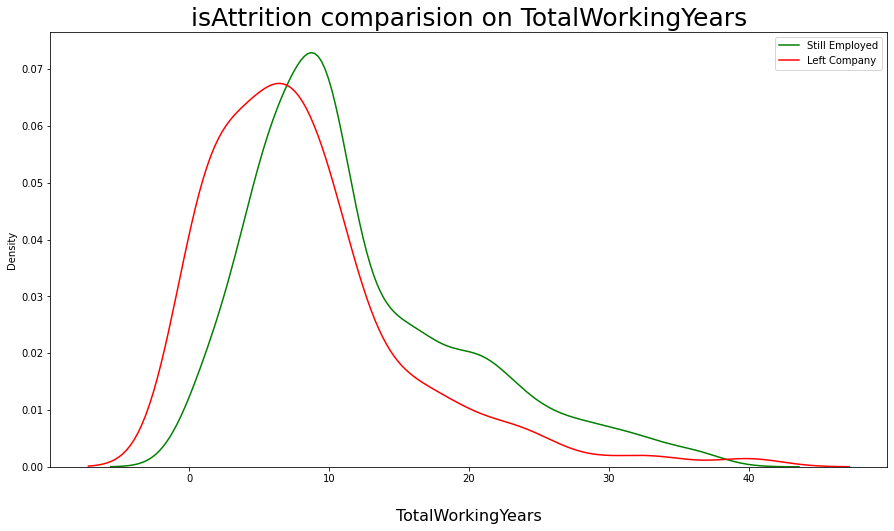

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(x = df_explore.loc[df_explore.Attrition == "No"].TotalWorkingYears, label = "Still Employed", color = "green")
ax = sns.kdeplot(x = df_explore.loc[df_explore.Attrition == "Yes"].TotalWorkingYears, label = "Left Company", color = "red")
plt.title('isAttrition comparision on TotalWorkingYears', fontsize=25)
ax.set_xlabel("TotalWorkingYears", labelpad = 25, fontsize=16)
ax.legend()

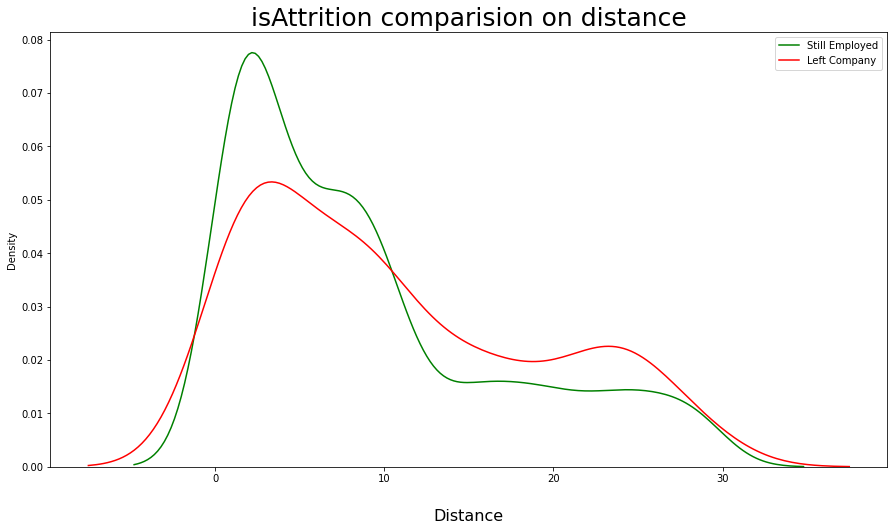

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(x = df_explore.loc[df_explore.Attrition == "No"].DistanceFromHome, label = "Still Employed", color = "green")
ax = sns.kdeplot(x = df_explore.loc[df_explore.Attrition == "Yes"].DistanceFromHome, label = "Left Company", color = "red")
plt.title('isAttrition comparision on distance', fontsize=25)
ax.set_xlabel("Distance", labelpad = 25, fontsize=16)
ax.legend()

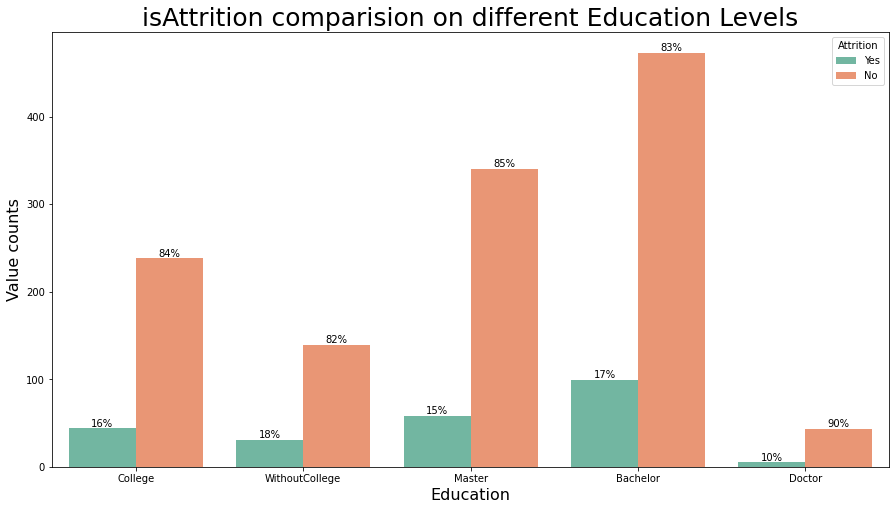

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Education',  hue='Attrition', data=df_explore)
plt.title('isAttrition comparision on different Education Levels', fontsize=25)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Value counts', fontsize=16)
barPerc(df_explore,'Education',ax)

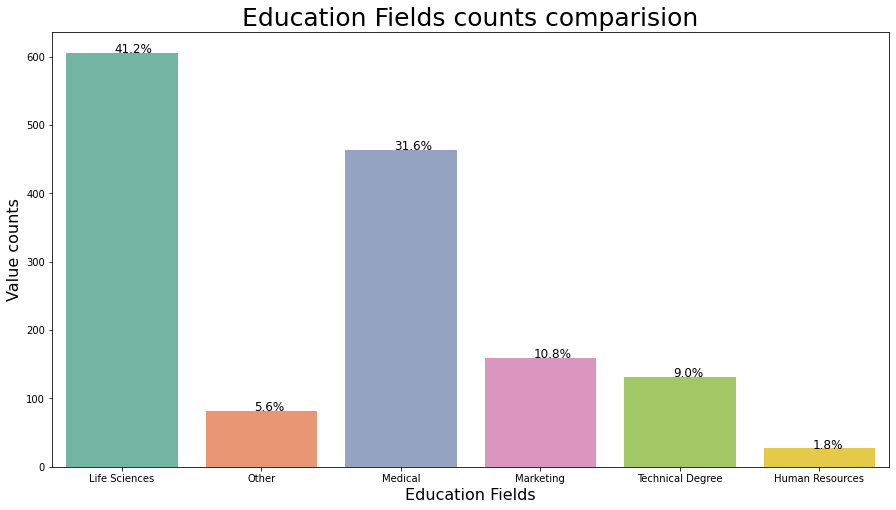

In [ ]:
# check value count distribution in isFraud column
plt.figure(figsize=(15,8))
ax = sns.countplot(x ='EducationField', data = df_explore)
plt.title('Education Fields counts comparision', fontsize=25)
plt.xlabel('Education Fields', fontsize=16)
plt.ylabel('Value counts', fontsize=16)
without_hue(ax, df_explore.EducationField)

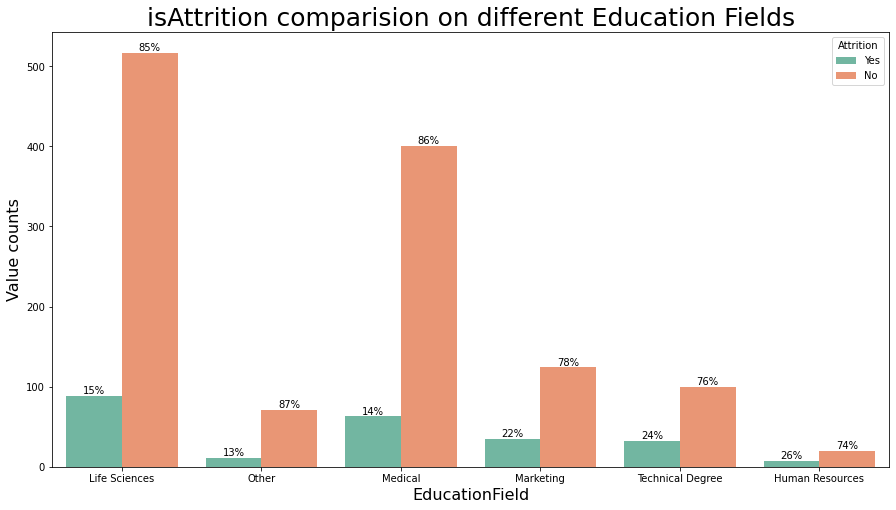

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='EducationField',  hue='Attrition', data=df_explore)
plt.title('isAttrition comparision on different Education Fields', fontsize=25)
plt.xlabel('EducationField', fontsize=16)
plt.ylabel('Value counts', fontsize=16)
barPerc(df_explore,'EducationField',ax)

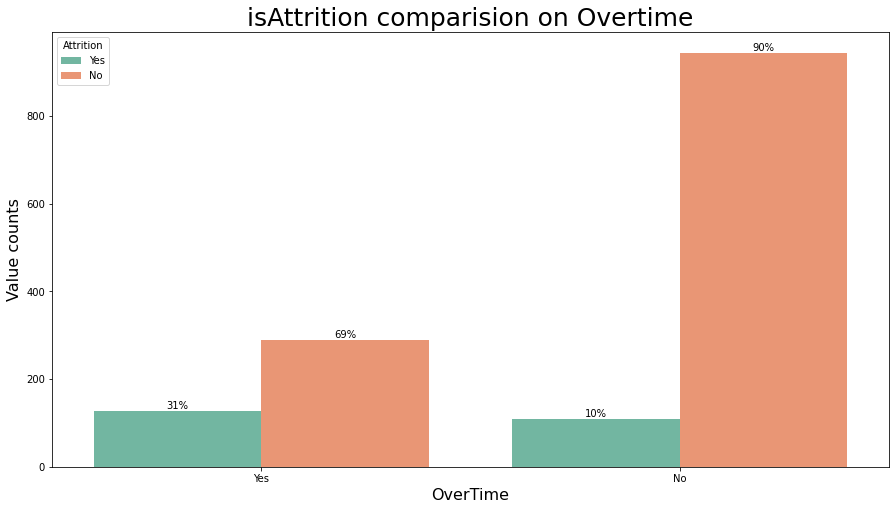

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='OverTime',  hue='Attrition', data=df_explore)
plt.title('isAttrition comparision on Overtime', fontsize=25)
plt.xlabel('OverTime', fontsize=16)
plt.ylabel('Value counts', fontsize=16)
barPerc(df_explore,'OverTime',ax)

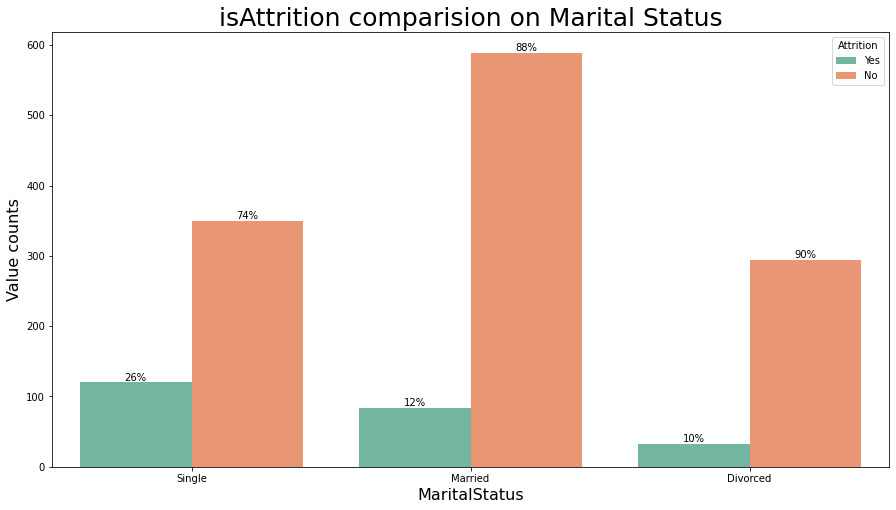

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='MaritalStatus',  hue='Attrition', data=df_explore)
plt.title('isAttrition comparision on Marital Status', fontsize=25)
plt.xlabel('MaritalStatus', fontsize=16)
plt.ylabel('Value counts', fontsize=16)
barPerc(df_explore,'MaritalStatus',ax)

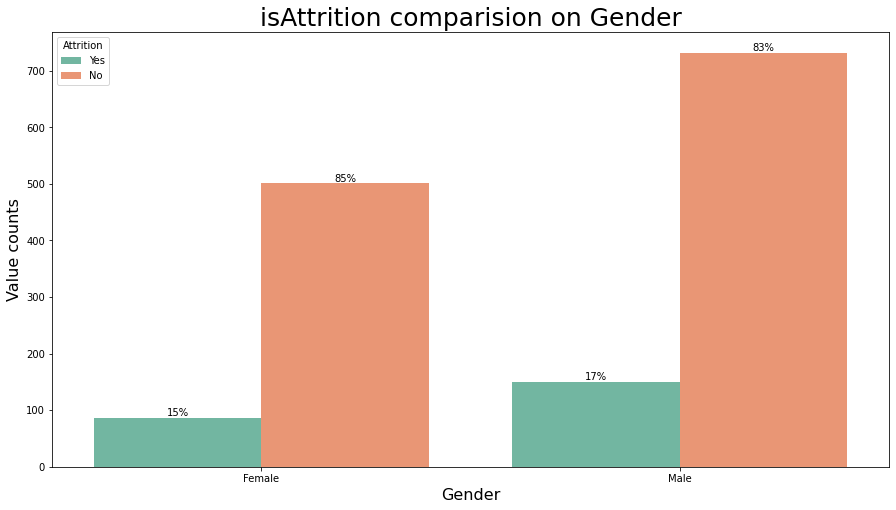

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Gender',  hue='Attrition', data=df_explore)
plt.title('isAttrition comparision on Gender', fontsize=25)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Value counts', fontsize=16)
barPerc(df_explore,'Gender',ax)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


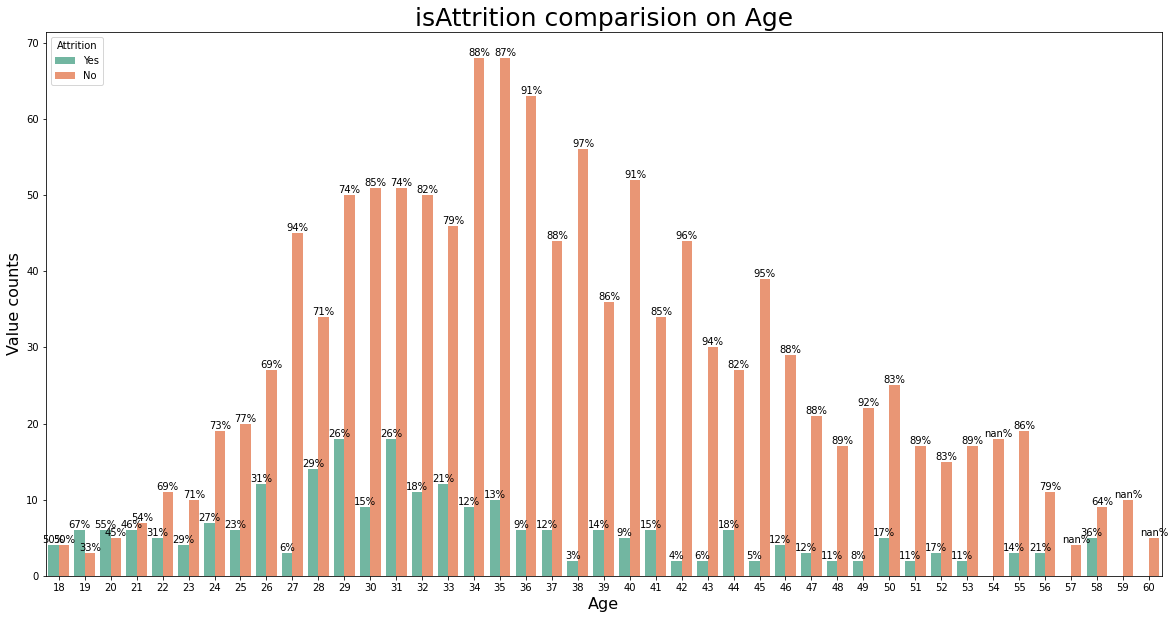

In [ ]:
plt.figure(figsize=(20,10))
ax =sns.countplot(data=df_explore, x='Age', hue='Attrition')
plt.title('isAttrition comparision on Age', fontsize=25)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Value counts', fontsize=16)
barPerc(df_explore,'Age',ax)

## 4. Feature Selection

### Feature Selection using Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.



In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df_Selection = df_merged.copy()
X = df_Selection.drop('Attrition_Yes', axis=1)  #independent columns
y = df_Selection.Attrition_Yes   #target column
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs          Score
30         MonthlyIncome  127922.293694
31           MonthlyRate    1196.633553
40     TotalWorkingYears     230.721618
43        YearsAtCompany     142.100054
44    YearsInCurrentRole     117.522596
46  YearsWithCurrManager     110.671534
1                    Age      84.155277
36          OverTime_Yes      63.845067
6       DistanceFromHome      63.772142
0         EmployeeNumber      58.120326


### Feature Selection using Feature Importance

We can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives us a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.02662903 0.03820991 0.0208953  0.01414643 0.00988086 0.00910646
 0.03070933 0.01510896 0.0095589  0.01582093 0.00569459 0.01329539
 0.01045615 0.03174893 0.03013827 0.02468584 0.03268855 0.00525059
 0.00518423 0.01619472 0.00282365 0.00614775 0.00226162 0.01058133
 0.01010626 0.01461259 0.02010584 0.01056733 0.01510044 0.02169817
 0.03397752 0.02778825 0.02749564 0.02499579 0.02955409 0.0278037
 0.06663273 0.02244377 0.01935537 0.03274269 0.03429386 0.02596348
 0.02952231 0.03210348 0.02899225 0.02689715 0.03002956]


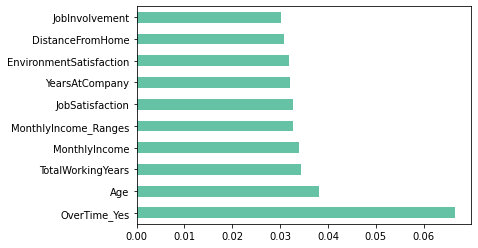

In [ ]:
df_Selection = df_merged.copy()
X = df_Selection.drop('Attrition_Yes', axis=1)  #independent columns
y = df_Selection.Attrition_Yes   #target column
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
feat_importances.nlargest(10)

OverTime_Yes               0.066633
Age                        0.038210
TotalWorkingYears          0.034294
MonthlyIncome              0.033978
MonthlyIncome_Ranges       0.032743
JobSatisfaction            0.032689
YearsAtCompany             0.032103
EnvironmentSatisfaction    0.031749
DistanceFromHome           0.030709
JobInvolvement             0.030138
dtype: float64

In [ ]:
extratree_features = ['OverTime_Yes','Age','MonthlyIncome','EnvironmentSatisfaction',
'MonthlyIncome_Ranges','DistanceFromHome','TotalWorkingYears','WorkLifeBalance',
'YearsAtCompany','JobSatisfaction']

### Feature Selection using Correlation Matrix with Heatmap

Heatmap usually makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

However, in our case, the result indicates that the highest correlation is over_time_yes. Other features doesn't have a signicant correlation.

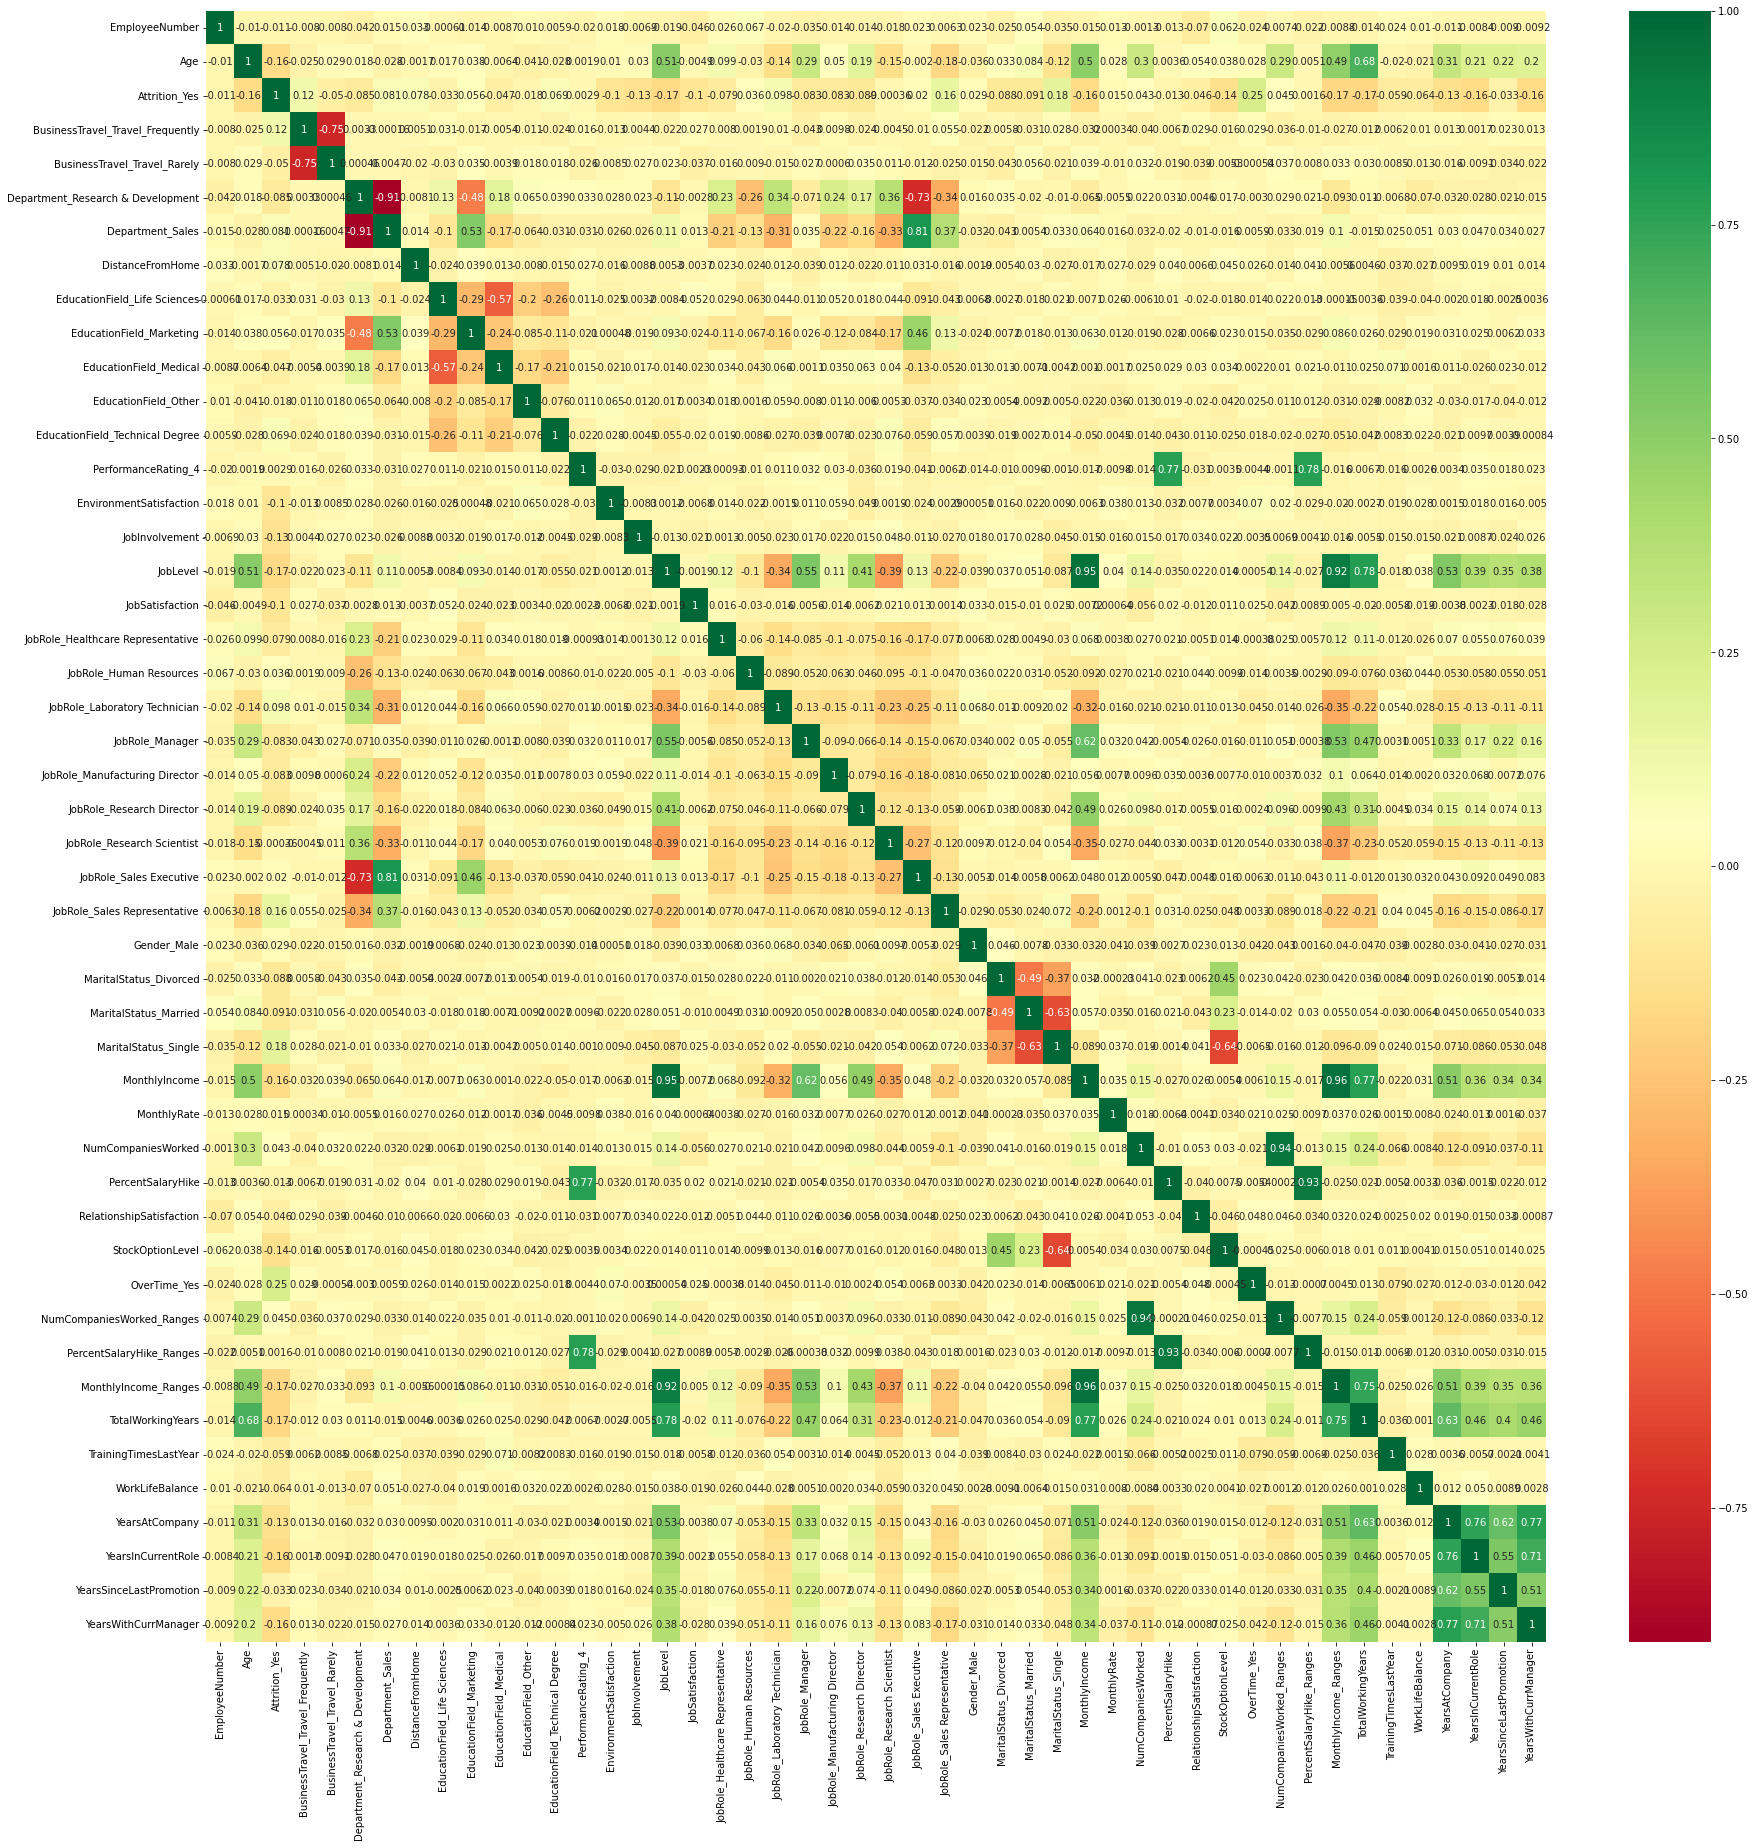

In [ ]:
df_Selection = df_merged.copy()
X = df_Selection.drop('Attrition_Yes', axis=1)  #independent columns
y = df_Selection.Attrition_Yes   #target column
#get correlations of each features in dataset
corrmat = df_Selection.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df_Selection[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Feature Selection using Lasso Regularization

Lasso or L1 regularization shrinks the coefficients of redundant features to 0, therefore those features can be removed from the training sample.

#### L1 Logistic (creates a list of features called l1_logit_features)

In [ ]:
# Version 2: LASSO Regularization (L1)
# https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
from sklearn. linear_model import LogisticRegression
from sklearn. feature_selection import SelectFromModel
# Read the dataset
df = df_merged.copy()

# Test with ln for salary
df['MonthlyIncome_ln'] = np.log(df['MonthlyIncome'])

# Split train and target features
y = df['Attrition_Yes']
X = df.drop(['Attrition_Yes', 'EmployeeNumber'], axis=1) # target field and employee ID field

# Set the regularization parameter C=1
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)

# Dropped columns have values of all 0s, keep other columns
#selected_features = x_train.columns[list(efs.best_idx_)]
selected_features = X
selected_columns = selected_features.columns[selected_features.var() != 0]
#selected_columns

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# View the features and take the top n
from pandas.core.frame import DataFrame
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.DataFrame(data=X.var())
df.reset_index(inplace = True)
df = df.rename({'index': 'Feature', 0: 'Score'}, axis=1)  # new method
df = df.sort_values(by='Score', ascending=False)
df.reset_index(inplace = True, drop=True)

l1_logit_features = ['MonthlyIncome',
 'Age',
 'DistanceFromHome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'PercentSalaryHike',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'YearsSinceLastPromotion',
 'NumCompaniesWorked']

df['Feature'].head(15).values.flatten().tolist()
#drop MonthlyIncome (use MonthlyRate instead)

['MonthlyRate',
 'MonthlyIncome',
 'Age',
 'DistanceFromHome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'PercentSalaryHike',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'YearsSinceLastPromotion',
 'NumCompaniesWorked',
 'MonthlyIncome_Ranges',
 'TrainingTimesLastYear',
 'JobLevel',
 'JobSatisfaction']

#### L1 SVC (creates a list of features called l1_svc_features)

https://scikit-learn.org/stable/modules/feature_selection.html

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
# Read the dataset
df = df_merged.copy()
# Split train and target features
y = df['Attrition_Yes']
X = df.drop(['Attrition_Yes', 'EmployeeNumber'], axis=1) # target field and employee ID field
print(X.shape)

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
feature_idx = model.get_support()
l1_svc_features = X.columns[feature_idx]
X_new = model.transform(X)
print(X_new.shape)

l1_svc_features

(1470, 46)
(1470, 17)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'MaritalStatus_Single', 'MonthlyIncome',
       'NumCompaniesWorked', 'RelationshipSatisfaction', 'StockOptionLevel',
       'OverTime_Yes', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Create a dataset with Synthetic samples using **SMOTE**

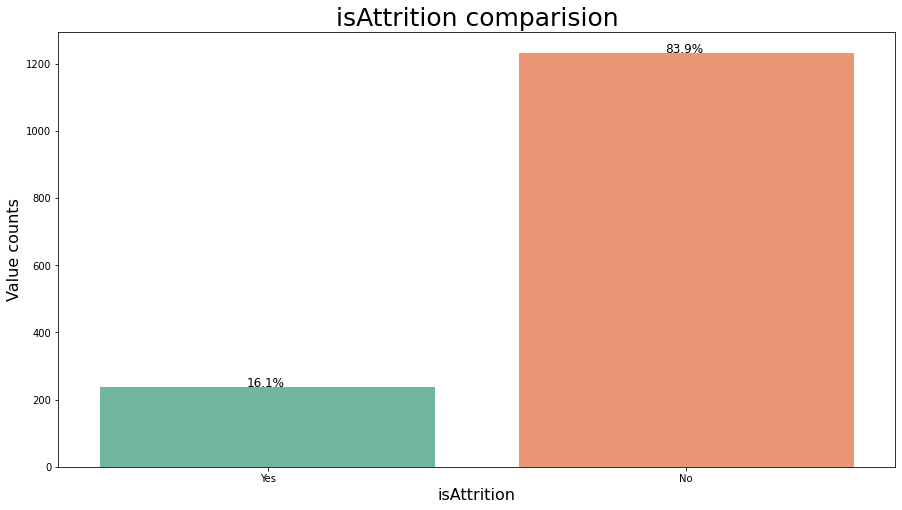

In [ ]:
# check value count distribution in isFraud column
plt.figure(figsize=(15,8))
ax = sns.countplot(x ='Attrition', data = df_explore)
plt.title('isAttrition comparision', fontsize=25)
plt.xlabel('isAttrition', fontsize=16)
plt.ylabel('Value counts', fontsize=16)
without_hue(ax, df_explore.Attrition)

In [ ]:
# Balance dataset using SMOTE
from joblib.parallel import DEFAULT_MP_CONTEXT
from sklearn.model_selection import train_test_split
# Create a dataset with Synthetic samples using SMOTE
# https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
df = df_merged.copy()

# Split train and target features
y = df['Attrition_Yes']
#X = df.drop(['Attrition_Yes', 'EmployeeNumber'], axis=1) # target field and employee ID field
#X = df.drop(['Attrition_Yes'], axis=1) # target field 
X = df[l1_logit_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
# Might want to see why high performance rating employees are leaving
# df_merged.loc[df_merged['PerformanceRating_4'] == 1]

In [ ]:
# Export resampled data
#df_combined = np.r_[X_res, y_res]
#df_combined = pd.concat([y_res, X_res], axis=1)
#df_combined.to_csv('hr_analytics_df_merged_balanced.csv')

## 5. Modeling

#### Create a logictic regression model using the top n features 

This model does not fit, so GLM Binomial is created instead.

In [ ]:
# Create a logistic regression with the top features on the original dataset
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import statsmodels.api as sm
#X = sm.add_constant(X)
logit_model=sm.Logit(y,sm.add_constant(
    X[l1_logit_features]
      )
      )
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                            Results: Logit
Model:                  Logit               Pseudo R-squared:    inf   
Dependent Variable:     Attrition_Yes       AIC:                 inf   
Date:                   2022-07-27 14:48    BIC:                 inf   
No. Observations:       1470                Log-Likelihood:      -inf  
Df Model:               10                  LL-Null:             0.0000
Df Residuals:           1459                LLR p-value:         1.0000
Converged:              1.0000              Scale:               1.0000
No. Iterations:         7.0000                                         
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                    0.1643   0.4722  0.3479 0.7279 -0.7612  1.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
# Because of errors above, try statmodels GLM Binomial which is the same model as Logit for binary endog but uses a different numerical approach
import statsmodels.api as sm
glm_binom = sm.GLM(y_res, sm.add_constant(X_res), family=sm.families.Binomial())
#glm_binom = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())
# pseudo rsquared
print("McFadden’s Pseudo R-squared: ")
print((1 - res.llf / res.llnull))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                 Generalized Linear Model Regression Results                  
Dep. Variable:          Attrition_Yes   No. Observations:                 1956
Model:                            GLM   Df Residuals:                     1945
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1173.4
Date:                Wed, 27 Jul 2022   Deviance:                       2346.8
Time:                        14:48:37   Pearson chi2:                 1.95e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# When we increase x by one unit the log odds of attrition change by β1 holding all else equal.

# When we increase x by one unit the odds are multiplied by exp(β1).
#import math
#counter = 0
#for i in res.params:
#  print(str(round(math.exp(i), 2)) + ' ' + str(math.copysign(1, i)) + ' in log odds when' + str(res.params[[counter]].index.values) + ' is increased by one unit')
#  counter = counter + 1

In [ ]:
df_merged.columns

Index(['EmployeeNumber', 'Age', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'DistanceFromHome', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'PerformanceRating_4', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction',
   

#### Predictive logistic model using balanced dataset

In [ ]:
# Fit a predictive logistic model with remaining features using balanced dataset
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_res , y_res)

LogisticRegression(max_iter=500)

In [ ]:
# Test model significance
# https://stackoverflow.com/questions/72279859/sklearn-linear-regression-model-analysis-statsmodels-api-summay-equivalent
# Also, from sklearn.feature_selection import f_regression f_statistic, p_value = f_regression(X_train, y_train) f_statistic, p_value
#from sklearn.feature_selection import f_regression 
#f_statistic, p_value = f_regression(X_res, y_res) 
#print(f_statistic, p_value )

#metrics.accuracy_score()


In [ ]:
## Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[158  97]
 [ 15  24]]


In [ ]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74       255
           1       0.20      0.62      0.30        39

    accuracy                           0.62       294
   macro avg       0.56      0.62      0.52       294
weighted avg       0.82      0.62      0.68       294



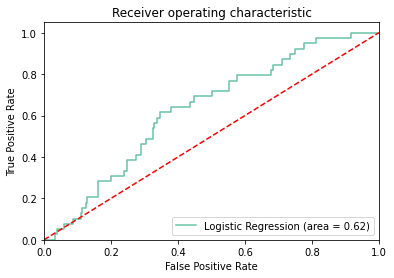

In [ ]:
# ROC Curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Random Forest

In [ ]:
# Feature selection
import pandas as pd
from sklearn.ensemble import *
from sklearn.feature_selection import SelectFromModel

# Balance dataset using SMOTE
from joblib.parallel import DEFAULT_MP_CONTEXT
from sklearn.model_selection import train_test_split
# Create a dataset with Synthetic samples using SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
df = df_merged.drop('EmployeeNumber', axis=1).copy()

# Split train and target features
y = df['Attrition_Yes']
#X = df.drop(['Attrition_Yes', 'EmployeeNumber'], axis=1) # target field and employee ID field
X = df.drop(['Attrition_Yes'], axis=1) # target field 
#X = df[l1_svc_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_res, y_res)

# To see which features are important
sel.get_support()

# We can now make a list and count the selected features.
selected_feat= X_res.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

# Check and plot the distribution of importance.
#pd.series(sel.estimator_,feature_importances_,.ravel()).hist()

# determine n most important features
selected_feat = feat_importances.nlargest(12)
rf_features = list(pd.DataFrame(selected_feat).index.values) 
#rf_features.remove('MonthlyIncome_Ranges')
print(len(rf_features))
print(rf_features)

22
Index(['Age', 'Department_Research & Development', 'DistanceFromHome',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MonthlyIncome', 'MonthlyRate', 'RelationshipSatisfaction',
       'StockOptionLevel', 'MonthlyIncome_Ranges', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')
12
['OverTime_Yes', 'Age', 'TotalWorkingYears', 'MonthlyIncome', 'MonthlyIncome_Ranges', 'JobSatisfaction', 'YearsAtCompany', 'EnvironmentSatisfaction', 'DistanceFromHome', 'JobInvolvement', 'YearsWithCurrManager', 'RelationshipSatisfaction']


In [ ]:
# Random Forest Model
# https://machinelearningmastery.com/random-forest-ensemble-in-python/
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

sm = SMOTE(random_state=42)
df = df_merged.drop('EmployeeNumber', axis=1).copy()

# Split train and target features
y = df['Attrition_Yes']
#X = df.drop(['Attrition_Yes', 'EmployeeNumber'], axis=1) # target field and employee ID field
#X = df.drop(['Attrition_Yes'], axis=1) # target field 
X = df[extratree_features] #performs better
#X = df[rf_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# define dataset
#X_res, y_res = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.853 (0.016)


In [ ]:
# make predictions using random forest for classification
# fit the model on the whole dataset
model.fit(X_res, y_res)
# make a single prediction
#row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
#yhat = model.predict(row)
#print('Predicted Class: %d' % yhat[0])

RandomForestClassifier()

In [ ]:
# Classification Report of Random forest
from sklearn.metrics import classification_report
y_preds = model.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       255
           1       0.30      0.41      0.35        39

    accuracy                           0.80       294
   macro avg       0.60      0.63      0.61       294
weighted avg       0.82      0.80      0.81       294



In [ ]:
# View confusion matrix for test data and predictions
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))

[[218  37]
 [ 23  16]]


Text(0.5, 0, 'Relative Importance')

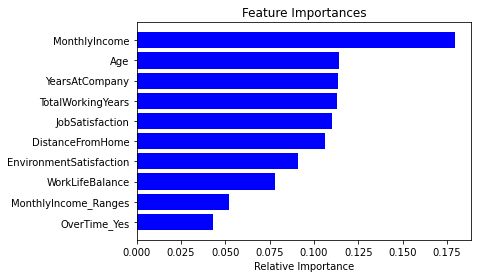

In [ ]:
features=X_res.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

#### Several models at once

In [ ]:
# Get data, reduce features, test/train split, and resample
sm = SMOTE(random_state=42)
df = df_merged.copy()
y = df['Attrition_Yes']
X = df[extratree_features] # rf_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Fit and test models
#https://www.analyticsvidhya.com/blog/2021/11/employee-attrition-prediction-a-comprehensive-guide/
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_res,y_res)
    prediction=a.predict(X_res)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_res,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))  

[Logistic Regression] training data accuracy is : 0.742331
[Logistic Regression] test data accuracy is : 0.738095
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       255
           1       0.26      0.54      0.35        39

    accuracy                           0.74       294
   macro avg       0.59      0.65      0.59       294
weighted avg       0.83      0.74      0.77       294

[[196  59]
 [ 18  21]]
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.697279
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       255
           1       0.19      0.38      0.25        39

    accuracy                           0.70       294
   macro avg       0.54      0.56      0.53       294
weighted avg       0.79      0.70      0.74       294

[[190  65]
 [ 24  15]]
[KNN] training data accuracy is : 0.851227
[KNN] test data accuracy is : 0.666667
  

In [ ]:
# Model Scores Accuracy
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Decision tree': 0.6972789115646258,
 'KNN classifier': 0.6666666666666666,
 'Logistic Regression': 0.7380952380952381,
 'Naive Bayes': 0.6428571428571429,
 'Random forest': 0.8129251700680272,
 'Support Vector Machine': 0.8027210884353742}

In [ ]:
#Model Comparison
#Based on the accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.738,0.667,0.803,0.813,0.697,0.643


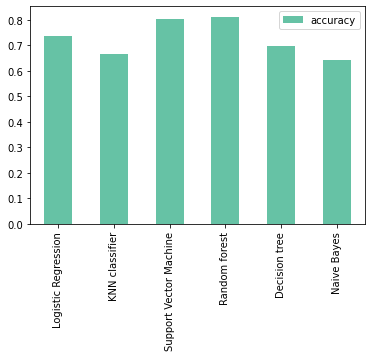

In [ ]:
# Visualize the accuracy of each model
model_compare.T.plot(kind='bar') # (T is here for transpose)

In [ ]:
# Feature importance
# These “coef’s” tell how much and in what way did each one of them contribute to predicting the target variable
# Logistic regression
feature_dict=dict(zip(df[l1_svc_features].columns,list(lr.coef_[0])))
feature_dict

{'Age': 0.9474193690520525,
 'DistanceFromHome': 0.02794456453162213,
 'EnvironmentSatisfaction': 8.694302215973695e-05,
 'JobInvolvement': -0.40035427931325157,
 'JobSatisfaction': -0.29507723928811924,
 'MaritalStatus_Single': 0.029850585867828024,
 'MonthlyIncome': -0.09534121172747927,
 'NumCompaniesWorked': -0.3912084305435083,
 'RelationshipSatisfaction': 0.004452043957129355,
 'StockOptionLevel': -0.4235469858255549}

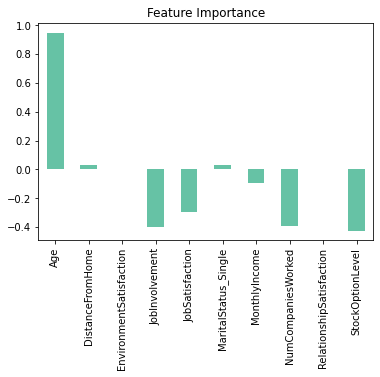

In [ ]:
# Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

## 6. Conclusions